In [257]:
#General stuff
import time
import datetime
import glob
import re
import pandas as pd
from collections import Counter
import progressbar
import jellyfish
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf
from collections import Counter
from itertools import chain

# Import Overall Data

In [286]:
df_de_soz_de = pd.read_csv('2007_2016_soz_de.csv')
df_de_soz_fr = pd.read_csv('2007_2016_soz_fr.csv')
df_de_straf_de = pd.read_csv('2007_2016_straf_de.csv')
df_de_straf_fr = pd.read_csv('2007_2016_straf_fr.csv')
df_de_ö = pd.read_csv('2007_2016_ör_de.csv')
df_fr_ö = pd.read_csv('2007_2016_ör_fr.csv')
df_de_ziv = pd.read_csv('2007_2016_ziv_de.csv')
df_fr_ziv = pd.read_csv('2007_2016_zivil_fr.csv')

In [287]:
df_overall = df_de_soz_de.merge(df_de_soz_fr, how='left', left_on='Years', right_on='Years')
df_overall = df_overall.merge(df_de_straf_de, how='left', left_on='Years', right_on='Years')
df_overall = df_overall.merge(df_de_straf_fr, how='left', left_on='Years', right_on='Years')
df_overall = df_overall.merge(df_de_ö, how='left', left_on='Years', right_on='Years')
df_overall = df_overall.merge(df_fr_ö, how='left', left_on='Years', right_on='Years')
df_overall = df_overall.merge(df_de_ziv, how='left', left_on='Years', right_on='Years')
df_overall = df_overall.merge(df_fr_ziv, how='left', left_on='Years', right_on='Years')

In [288]:
del df_overall['Unnamed: 0_x']
del df_overall['Datetime_x']
del df_overall['Unnamed: 0_y']
del df_overall['Datetime_y']

In [289]:
df_overall.index = df_overall['Years']

In [290]:
del df_overall['Years']

In [291]:
df_overall['Total'] = df_overall.sum(axis=1)

In [292]:
df_overall

,TOTAL_x,TOTAL_y,TOTAL_x,TOTAL_y,TOTAL_x,TOTAL_y,TOTAL_x,TOTAL_y,Total
Years,,,,,,,,,
2007,2461,696,80,345,8,203,244,525,4562
2008,1366,1446,295,802,1896,132,688,377,7002
2009,1993,623,669,296,130,55,1574,2158,7498
2010,2741,1391,107,450,40,49,1596,1505,7879
2011,2170,1744,80,110,181,3285,2497,1195,11262
2012,1973,1287,70,151,248,229,2243,1555,7756
2013,2280,1292,292,213,541,3990,2156,664,11428
2014,4086,1185,249,1668,549,652,4214,552,13155
2015,3303,1116,608,1801,663,1140,3987,659,13277


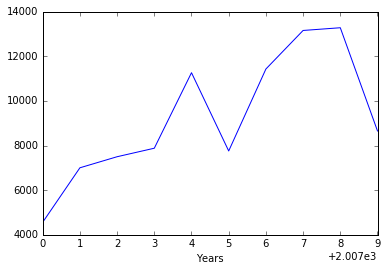

In [293]:
df_overall['Total'].plot()

In [294]:
df_overall = df_overall.reset_index()

In [295]:
lm = smf.ols(formula="Years~Total",data=df_overall).fit()

In [296]:
intercept, slope = lm.params

In [297]:
lm.params

Intercept    2004.321693
Total           0.000776
dtype: float64

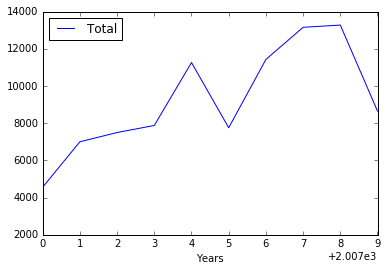

In [298]:
df_overall.plot(x="Years",y="Total")
plt.plot(df_overall["Years"],slope*df_overall["Years"]+intercept,"-",color="red") 

# Import Clerk Data

In [227]:
df_fr = pd.read_csv('soz_500_fr.csv')
df_de = pd.read_csv('soz_500_de.csv')
df_de_straf = pd.read_csv('straf_500_de.csv')
df_fr_straf = pd.read_csv('straf_500_fr.csv')
#df_de_ö = pd.read_csv('ör_500_de.csv')
#df_fr_ö = pd.read_csv('ör_500_fr.csv')
df_de_ziv = pd.read_csv('ziv_500_de.csv')
df_fr_ziv = pd.read_csv('zivil_500_fr.csv')

# Harmonising Column names

In [244]:
df_fr.columns = [['Schreiberharm', 'ELEM 500 COUNT', 'TOTAL APPEALS', 'ElempCase', 'Gutgeheissen']]
#df_fr_ö.columns = [['Schreiberharm', 'ELEM 500 COUNT', 'TOTAL APPEALS', 'ElempCase', 'Gutgeheissen']]
df_fr_straf.columns = [['Schreiberharm', 'ELEM 500 COUNT', 'TOTAL APPEALS', 'ElempCase', 'Gutgeheissen']]
df_fr_ziv.columns = [['Schreiberharm', 'ELEM 500 COUNT', 'TOTAL APPEALS', 'ElempCase', 'Gutgeheissen']]

# Concat the files

In [245]:
frames = [df_fr, df_de, df_de_straf, df_fr_straf, df_de_ziv, df_fr_ziv]
df = pd.concat(frames)

In [246]:
df.head()

,Schreiberharm,ELEM 500 COUNT,TOTAL APPEALS,ElempCase,Gutgeheissen
0,Piguet,3649,465.0,7.8,28.0
1,Cretton,2422,424.0,5.7,21.4
2,Berthoud,1081,316.0,3.4,19.6
3,Wagner,998,233.0,4.3,19.0
4,Bouverat,509,119.0,4.3,20.1


# Slope or not?

In [247]:
lm = smf.ols(formula="ElempCase~Gutgeheissen",data=df).fit()

In [248]:
intercept, slope = lm.params

In [249]:
lm.params

Intercept       2.116294
Gutgeheissen   -0.026143
dtype: float64

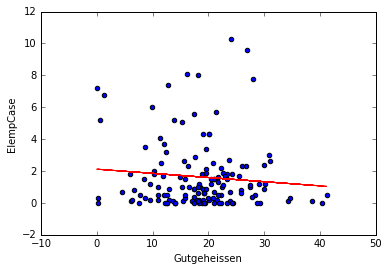

In [250]:
df.plot(kind='scatter', x="Gutgeheissen",y="ElempCase")
plt.plot(df["Gutgeheissen"],slope*df["Gutgeheissen"]+intercept,"-",color="red") 

In [255]:
df.to_csv('data_for_statcheck.csv')

# Who are there outliers?

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 25
Data columns (total 5 columns):
Schreiberharm     145 non-null object
ELEM 500 COUNT    145 non-null int64
TOTAL APPEALS     145 non-null float64
ElempCase         145 non-null float64
Gutgeheissen      142 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.8+ KB


In [252]:
df[df['ElempCase'] > 6]

,Schreiberharm,ELEM 500 COUNT,TOTAL APPEALS,ElempCase,Gutgeheissen
0,Piguet,3649,465.0,7.8,28.0
6,Bleicker,458,64.0,7.2,0.0
0,Durizzo,3286,406.0,8.1,16.2
1,Riedi Hunold,3194,310.0,10.3,24.0
2,Holzer,2506,260.0,9.6,27.0
4,Nabold,1397,174.0,8.0,18.2
5,Furrer,1163,158.0,7.4,12.7
2,Brugger,440,65.0,6.8,1.3


In [253]:
df['ElempCase'].describe()

count    145.000000
mean       1.602069
std        2.103452
min        0.000000
25%        0.200000
50%        0.900000
75%        1.900000
max       10.300000
Name: ElempCase, dtype: float64